In [11]:
# import the libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# reading the file 
df=pd.read_csv('counterfeit_products_renamed.csv')
df.head()

,item_ref,vendor_code,product_type,manufacturer,cost_usd,vendor_score,feedback_count,image_qty,desc_chars,delivery_period,...,dispatch_loc,page_hits,sales_vol,saved_items,trust_seals,guarantee_term,wholesale_avail,payment_anomaly,geo_inconsistency,fraud_indicator
0,dcb12716,seller_5426,Electronics,DigitalPro,218.54,4.9,5291,7,220,7,...,JP,3454,99,23,2,21,True,False,True,False
1,d1f8b777,seller_4385,Luxury Goods,TechCrop,NaN,3.2,29,2,179,41,...,CA,4127,252,88,0,9,False,False,False,True
2,9989f13a,seller_2528,Fashion,FashionForward,18.87,3.9,14,2,100,25,...,CN,3212,306,6,4,8,True,True,False,True
3,4e008120,seller_8099,Electronics,CircuitMaster,79.27,4.9,8533,4,976,10,...,CN,1488,7,46,2,13,False,False,False,False
4,933b65ba,seller_7873,Luxury Goods,PremiumCraft,225.98,3.8,7655,4,589,6,...,DE,171,9,5,3,13,False,False,False,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_ref           5000 non-null   object 
 1   vendor_code        5000 non-null   object 
 2   product_type       5000 non-null   object 
 3   manufacturer       5000 non-null   object 
 4   cost_usd           3652 non-null   float64
 5   vendor_score       5000 non-null   float64
 6   feedback_count     5000 non-null   int64  
 7   image_qty          5000 non-null   int64  
 8   desc_chars         5000 non-null   int64  
 9   delivery_period    5000 non-null   int64  
 10  typo_count         5000 non-null   int64  
 11  site_age           5000 non-null   float64
 12  contact_valid      5000 non-null   bool   
 13  return_clarity     5000 non-null   bool   
 14  payment_options    5000 non-null   int64  
 15  post_timestamp     5000 non-null   object 
 16  vendor_nation      5000 

In [5]:
# total number of null values in the dataset
df.isnull().sum()

item_ref                0
vendor_code             0
product_type            0
manufacturer            0
cost_usd             1348
vendor_score            0
feedback_count          0
image_qty               0
desc_chars              0
delivery_period         0
typo_count              0
site_age                0
contact_valid           0
return_clarity          0
payment_options         0
post_timestamp          0
vendor_nation           0
dispatch_loc          747
page_hits               0
sales_vol               0
saved_items             0
trust_seals             0
guarantee_term          0
wholesale_avail         0
payment_anomaly         0
geo_inconsistency    1249
fraud_indicator         0
dtype: int64

In [6]:
df.shape

(5000, 27)

<Axes: xlabel='count', ylabel='product_type'>

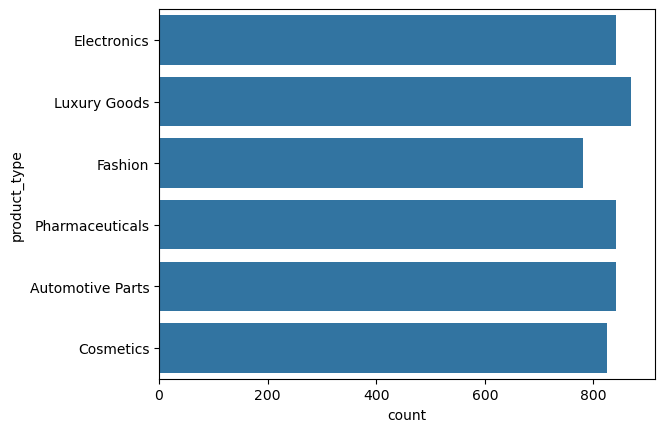

In [12]:
# count of product types sold 
sns.countplot(df['product_type'])

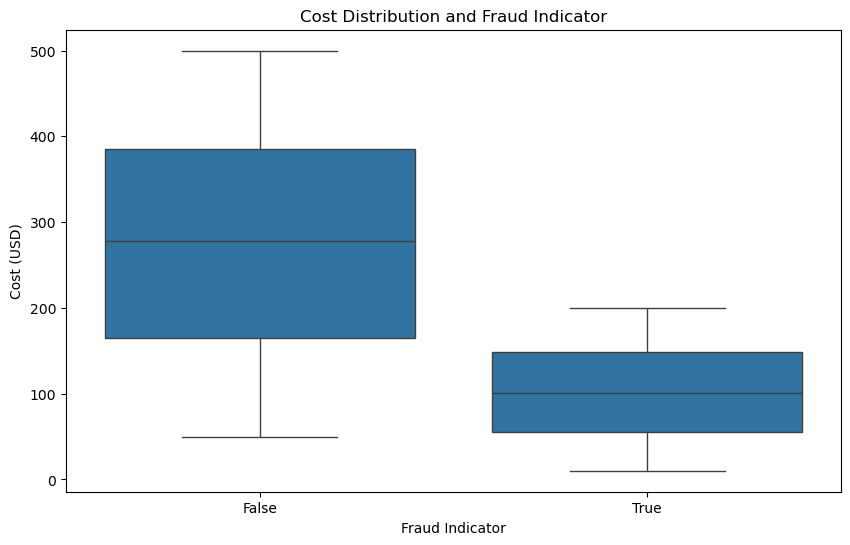

In [22]:
# Finding most frauds happen at what price point
df_clean=df.dropna(subset=['cost_usd'])
plt.figure(figsize=(10,6))
sns.boxplot(x='fraud_indicator',y='cost_usd',data=df_clean)
plt.title('Cost Distribution and Fraud Indicator')
plt.xlabel('Fraud Indicator')
plt.ylabel('Cost (USD)')
plt.show()

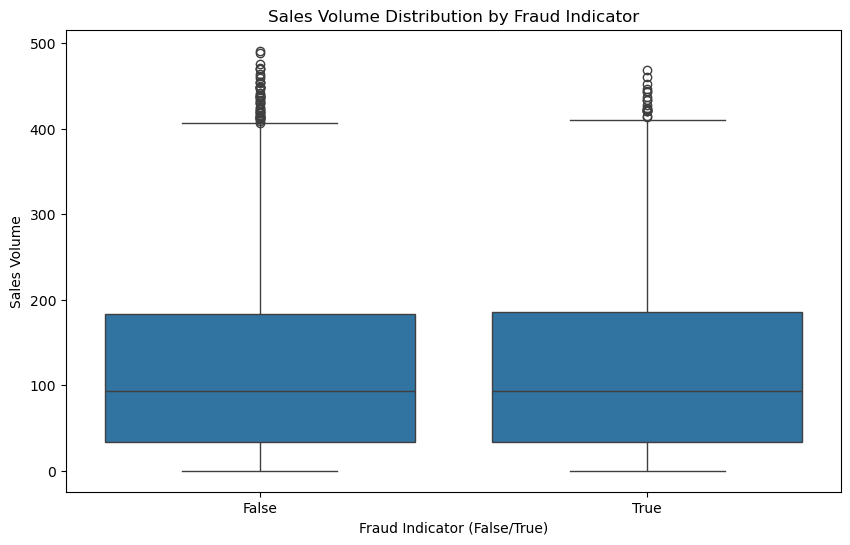

In [30]:
# relationship between sales volume and fraud 
plt.figure(figsize=(10,6))
sns.boxplot(x='fraud_indicator', y='sales_vol', data=df_clean)
plt.title('Sales Volume Distribution by Fraud Indicator')
plt.xlabel('Fraud Indicator (False/True)')
plt.ylabel('Sales Volume')
plt.show()

In [25]:
df.head()

,item_ref,vendor_code,product_type,manufacturer,cost_usd,vendor_score,feedback_count,image_qty,desc_chars,delivery_period,...,dispatch_loc,page_hits,sales_vol,saved_items,trust_seals,guarantee_term,wholesale_avail,payment_anomaly,geo_inconsistency,fraud_indicator
0,dcb12716,seller_5426,Electronics,DigitalPro,218.54,4.9,5291,7,220,7,...,JP,3454,99,23,2,21,True,False,True,False
1,d1f8b777,seller_4385,Luxury Goods,TechCrop,NaN,3.2,29,2,179,41,...,CA,4127,252,88,0,9,False,False,False,True
2,9989f13a,seller_2528,Fashion,FashionForward,18.87,3.9,14,2,100,25,...,CN,3212,306,6,4,8,True,True,False,True
3,4e008120,seller_8099,Electronics,CircuitMaster,79.27,4.9,8533,4,976,10,...,CN,1488,7,46,2,13,False,False,False,False
4,933b65ba,seller_7873,Luxury Goods,PremiumCraft,225.98,3.8,7655,4,589,6,...,DE,171,9,5,3,13,False,False,False,False


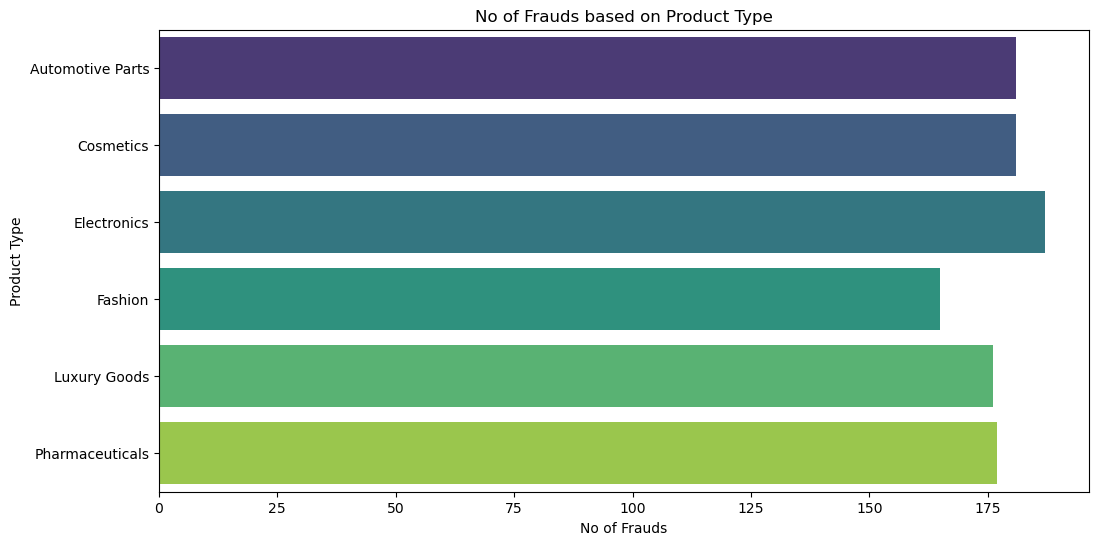

In [32]:
# finding the most fradulant category 
fraud_cat=df_clean.groupby('product_type')['fraud_indicator'].sum()
plt.figure(figsize=(12,6))
sns.barplot(x=fraud_cat.values, y=fraud_cat.index, hue=fraud_cat.index, palette='viridis', legend=False)
plt.title('No of Frauds based on Product Type')
plt.xlabel('No of Frauds')
plt.ylabel('Product Type')
plt.show()

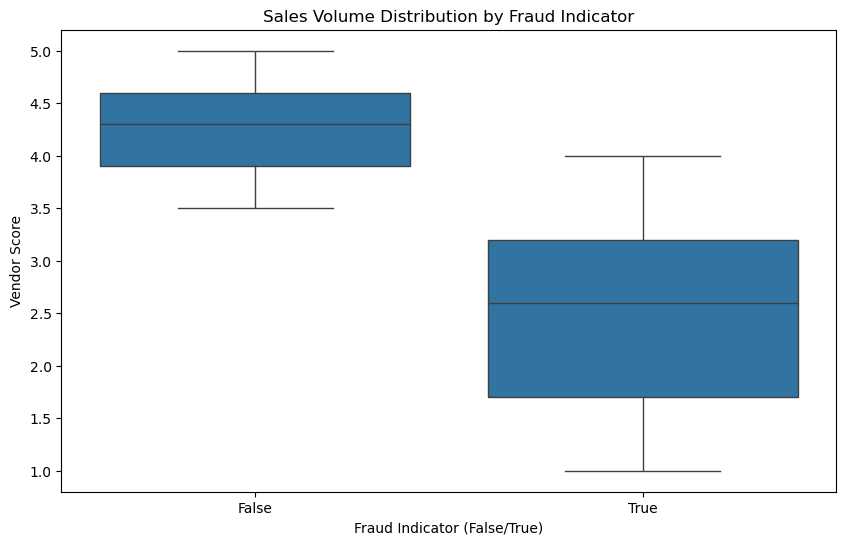

In [35]:
# shows fraud and seller rating relationship
plt.figure(figsize=(10,6))
sns.boxplot(x='fraud_indicator', y='vendor_score', data=df_clean)
plt.title('Fraud vs Seller Score')
plt.xlabel('Fraud Indicator (False/True)')
plt.ylabel('Vendor Score')
plt.show()

In [33]:
df.head()

,item_ref,vendor_code,product_type,manufacturer,cost_usd,vendor_score,feedback_count,image_qty,desc_chars,delivery_period,...,dispatch_loc,page_hits,sales_vol,saved_items,trust_seals,guarantee_term,wholesale_avail,payment_anomaly,geo_inconsistency,fraud_indicator
0,dcb12716,seller_5426,Electronics,DigitalPro,218.54,4.9,5291,7,220,7,...,JP,3454,99,23,2,21,True,False,True,False
1,d1f8b777,seller_4385,Luxury Goods,TechCrop,NaN,3.2,29,2,179,41,...,CA,4127,252,88,0,9,False,False,False,True
2,9989f13a,seller_2528,Fashion,FashionForward,18.87,3.9,14,2,100,25,...,CN,3212,306,6,4,8,True,True,False,True
3,4e008120,seller_8099,Electronics,CircuitMaster,79.27,4.9,8533,4,976,10,...,CN,1488,7,46,2,13,False,False,False,False
4,933b65ba,seller_7873,Luxury Goods,PremiumCraft,225.98,3.8,7655,4,589,6,...,DE,171,9,5,3,13,False,False,False,False


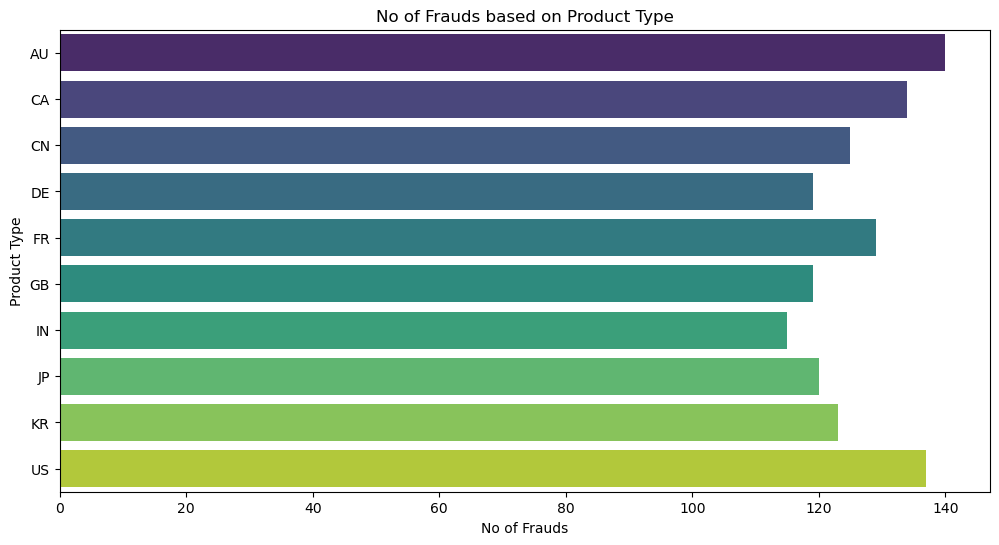

In [39]:
# Most Fradulant Dispatch Locations
fraud_by_loc=df.groupby('dispatch_loc')['fraud_indicator'].sum()
plt.figure(figsize=(12,6))
sns.barplot(x=fraud_by_loc.values, y=fraud_by_loc.index, hue=fraud_by_loc.index, palette='viridis', legend=False)
plt.title('No of Frauds based on Dispatch Loc')
plt.xlabel('No of Frauds')
plt.ylabel('Product Type')
plt.show()

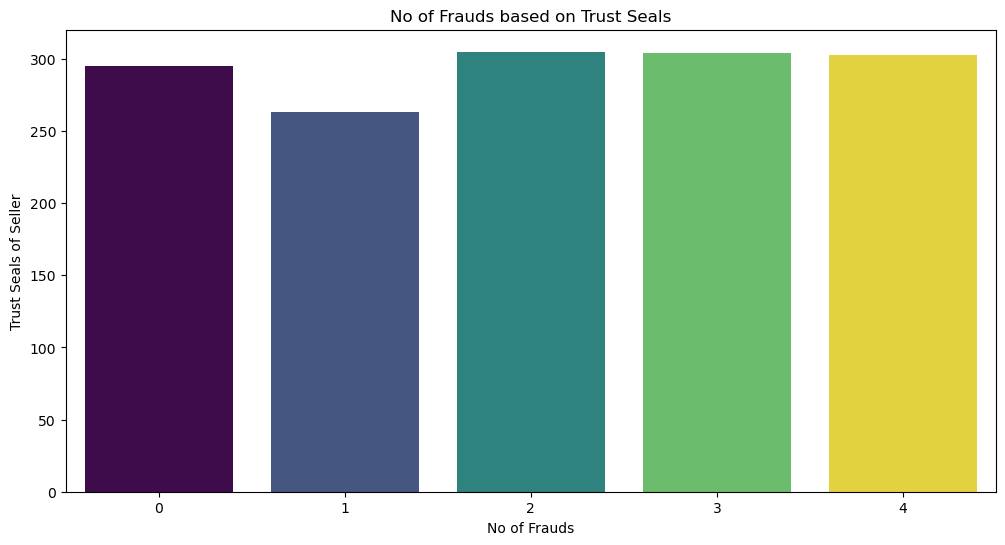

In [42]:
fraud_by_seals=df.groupby('trust_seals')['fraud_indicator'].sum()
plt.figure(figsize=(12,6))
sns.barplot(y=fraud_by_seals.values, x=fraud_by_seals.index, hue=fraud_by_seals.index, palette='viridis', legend=False)
plt.title('No of Frauds based on Trust Seals')
plt.xlabel('No of Frauds')
plt.ylabel('Trust Seals of Seller')
plt.show()

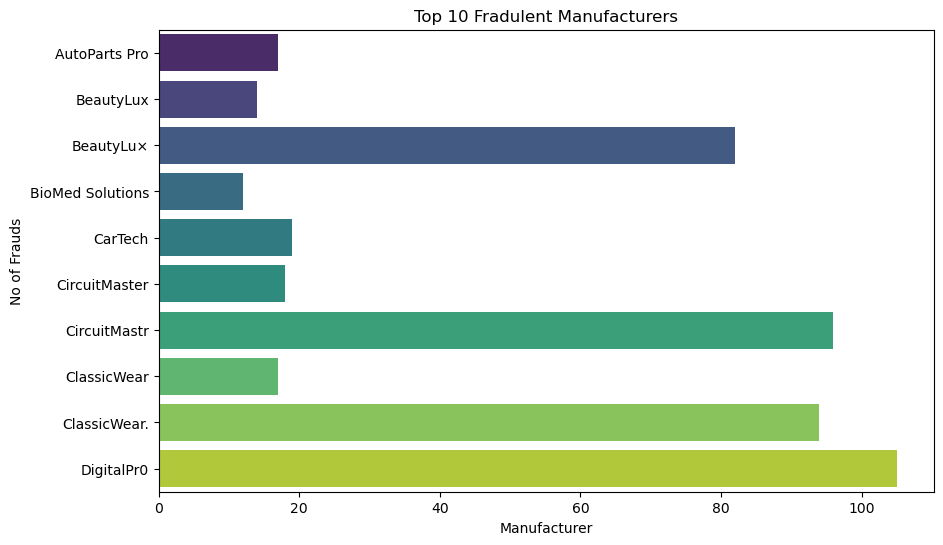

In [51]:
fraud_manu=df.groupby('manufacturer')['fraud_indicator'].sum().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=fraud_manu.values, y=fraud_manu.index, hue=fraud_manu.index, palette='viridis', legend=False)
plt.title("Top 10 Fradulent Manufacturers")
plt.xlabel('Manufacturer')
plt.ylabel('No of Frauds')
plt.show()

# Task 2: Building ML Model

In [28]:
#import libraries
import pandas as pd
import numpy as np

In [29]:
#importing sklearn libraries 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.impute import SimpleImputer

In [30]:
# reading data
df = pd.read_csv('counterfeit_products_renamed.csv')

In [32]:
df.head()

,item_ref,vendor_code,product_type,manufacturer,cost_usd,vendor_score,feedback_count,image_qty,desc_chars,delivery_period,...,dispatch_loc,page_hits,sales_vol,saved_items,trust_seals,guarantee_term,wholesale_avail,payment_anomaly,geo_inconsistency,fraud_indicator
0,dcb12716,seller_5426,Electronics,DigitalPro,218.540,4.9,5291,7,220,7,...,JP,3454,99,23,2,21,True,False,True,False
1,d1f8b777,seller_4385,Luxury Goods,TechCrop,191.815,3.2,29,2,179,41,...,CA,4127,252,88,0,9,False,False,False,True
2,9989f13a,seller_2528,Fashion,FashionForward,18.870,3.9,14,2,100,25,...,CN,3212,306,6,4,8,True,True,False,True
3,4e008120,seller_8099,Electronics,CircuitMaster,79.270,4.9,8533,4,976,10,...,CN,1488,7,46,2,13,False,False,False,False
4,933b65ba,seller_7873,Luxury Goods,PremiumCraft,225.980,3.8,7655,4,589,6,...,DE,171,9,5,3,13,False,False,False,False


In [49]:
# filling missing values 
df.loc[:, 'cost_usd'] = df['cost_usd'].fillna(df['cost_usd'].median())
df.loc[:, 'dispatch_loc'] = df['dispatch_loc'].fillna(df['dispatch_loc'].mode()[0])
df.loc[:, 'geo_inconsistency'] = df['geo_inconsistency'].fillna(False)


In [50]:
# converting boolean to 0 and 1 for model fitting 
bool_cols = ['contact_valid', 'return_clarity', 'wholesale_avail', 'payment_anomaly', 'fraud_indicator']

for col in bool_cols:
    df.loc[:, col] = df[col].astype(int)

df.loc[:, 'geo_inconsistency'] = df['geo_inconsistency'].astype(str)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_ref           5000 non-null   object 
 1   vendor_code        5000 non-null   object 
 2   product_type       5000 non-null   object 
 3   manufacturer       5000 non-null   object 
 4   cost_usd           5000 non-null   float64
 5   vendor_score       5000 non-null   float64
 6   feedback_count     5000 non-null   int64  
 7   image_qty          5000 non-null   int64  
 8   desc_chars         5000 non-null   int64  
 9   delivery_period    5000 non-null   int64  
 10  typo_count         5000 non-null   int64  
 11  site_age           5000 non-null   float64
 12  contact_valid      5000 non-null   int32  
 13  return_clarity     5000 non-null   int32  
 14  payment_options    5000 non-null   int64  
 15  post_timestamp     5000 non-null   object 
 16  vendor_nation      5000 

In [36]:
# converting time in string to datetime as string is not understood by models like Decision Tree Classifier 
df['post_timestamp'] = pd.to_datetime(df['post_timestamp'], errors='coerce')
df = df.loc[df['post_timestamp'].notna()].copy()

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3504 entries, 0 to 4999
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   item_ref           3504 non-null   object        
 1   vendor_code        3504 non-null   object        
 2   product_type       3504 non-null   object        
 3   manufacturer       3504 non-null   object        
 4   cost_usd           3504 non-null   float64       
 5   vendor_score       3504 non-null   float64       
 6   feedback_count     3504 non-null   int64         
 7   image_qty          3504 non-null   int64         
 8   desc_chars         3504 non-null   int64         
 9   delivery_period    3504 non-null   int64         
 10  typo_count         3504 non-null   int64         
 11  site_age           3504 non-null   float64       
 12  contact_valid      3504 non-null   int32         
 13  return_clarity     3504 non-null   int32         
 14  payment_optio

In [38]:
# dividing the datetime further into year, month and day of week 
df.loc[:, 'post_year'] = df['post_timestamp'].dt.year
df.loc[:, 'post_month'] = df['post_timestamp'].dt.month
df.loc[:, 'post_dayofweek'] = df['post_timestamp'].dt.dayofweek

In [39]:
# dropping extra features, finding the numerical and categorical features  
df = df.drop(columns=['item_ref', 'vendor_code', 'post_timestamp'])
X = df.drop('fraud_indicator', axis=1)
y = df['fraud_indicator']
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [40]:
# splitting the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# buidling pipelines for transformations and encoding categorical data 
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num_pipe', numerical_transformer, numerical_features),
        ('cat_pipe', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

In [42]:
# making algorithm objects  
log_reg = LogisticRegression()
dec_tree = DecisionTreeClassifier()

In [43]:
# calling the object 
pipeline_log_reg = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('classifier', log_reg)])

pipeline_dec_tree = Pipeline(steps=[('preprocessor', preprocessor),
                                    ('classifier', dec_tree)])

In [44]:
# fitting the data 
pipeline_log_reg.fit(X_train, y_train)
pipeline_dec_tree.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_pipe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['cost_usd', 'vendor_score', 'feedback_count', 'image_qty', 'desc_chars',
       'delivery_period', 'typo_count', 'site_age', 'payment_options',
       'page_hits', 'sales_vol', 'saved_items', 'trust_seals',
       'guarantee_term'],
      dtype='object')),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['product_type', 'manufacturer', 'vendor_nation', 'dispatch_loc',
       'geo_inconsistency'],
      dtype='object'))])),
                ('classifier', DecisionTreeClassifier())])

In [45]:
# predicting and evaluating 
y_pred_log_reg=pipeline_log_reg.predict(X_test)
print(confusion_matrix(y_test, y_pred_log_reg))

[[489   0]
 [  1 211]]


In [46]:
# predicting and evaluating 
y_pred_dec_tree=pipeline_dec_tree.predict(X_test)
print(confusion_matrix(y_test, y_pred_dec_tree))

[[489   0]
 [  0 212]]


In [47]:
# Cross-validation for more robust performance estimation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results_log_reg = cross_val_score(pipeline_log_reg, X, y, cv=kfold, scoring='f1')
print(f"Logistic Regression F1-scores: {cv_results_log_reg}")
print(f"Mean F1-score: {cv_results_log_reg.mean():.4f}")

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Logistic Regression F1-scores: [0.99763593 1.         1.         1.         1.        ]
Mean F1-score: 0.9995


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:
# Cross-validation for more robust performance estimation
cv_results_dec_tree = cross_val_score(pipeline_dec_tree, X, y, cv=kfold, scoring='f1')
print(f"\nDecision Tree F1-scores: {cv_results_dec_tree}")
print(f"Mean F1-score: {cv_results_dec_tree.mean():.4f}")


Decision Tree F1-scores: [1. 1. 1. 1. 1.]
Mean F1-score: 1.0000


# Task 3: Event Ideation

### Theme and Problem Statement

#### Chrono-Cipher: The Temporal Heist
#### The Cryptographer's Gambit: Decoding a Lost History (Data Science Track)

In a covert operation, a team of digital archaeologists has uncovered a cache of century-old telegraphs, believed to contain clues to a legendary lost treasure. These documents, however, are severely corrupted by the passage of time, with missing words, garbled timestamps, and fragmented sender information. Your mission is to act as a data scientist, piecing together the broken narrative to reveal the final, crucial coordinates.

The participants will be given a file (chronos.csv) which will contain message_id which will be a unique identifier for each message snippet. It will have timestamps with typos which will need to be cleaned to proceed further. The sender_location, the text_message and the cipher_fragment, which represents a small portion of a larger code, with some fragments completely missing. 

It will have immediate complexity as there is no direct target variable for the supervised training model. The true objective is to perform a series of data cleaning, imputation, and feature engineering tasks to reveal a hidden pattern within the numerical cipher_fragment column. 

Your final output should be a single numerical string that is the result of applying a specific Reed-Solomon error correction algorithm to a cleaned, concatenated version of the cipher_fragment column. This number, once generated, must then be converted to its ASCII equivalent to produce the final password.

This problem is classified as Intermediate because it goes beyond standard classification or regression tasks. Participants will need to demonstrate proficiency in:

1. Data Cleaning and Imputation: Handling various types of missing data and data errors across both categorical and text fields.

2. Feature Engineering: Creating new features from the existing data to bridge the gaps in the timestamps and reveal the correct message order.

3. Exploratory Data Analysis: The lack of a target variable means that participants must use EDA techniques to identify patterns and relationships within the dataset to guide their cleaning and engineering efforts.

4. Domain Knowledge Application: The final step requires knowledge of error correction and ASCII conversion, which are not typical for a beginner's modeling exercise.

# Task 4: NLP – Spam vs Ham Classification